In [134]:
################################
# Scientific imports
################################
import gc
import matplotlib.pyplot as plt
import numpy as np
import fnmatch

################################
# General imports
################################
import csv, math, io, os, os.path, sys, random, time, json, re
import pandas as pd
import seaborn as sb
from tqdm.notebook import tqdm, trange

################################
# SciKitLearn Imports
################################
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from IPython.display import display

################################
# MatPlotLib Settings
################################
plt.rcParams["figure.figsize"] = (14,16)
sb.set()

In [137]:
def MAKEBARCHARTS():
    
    # Load the JSON files
    jsonList = []

    for root, dirs, files in os.walk("./sktime_results/"):
        for file in files:

            if file.endswith(".json"):
                jsonList.append(os.path.join(root, file))
                #print(os.path.join(root, file))
    jsonList.sort()
    
    # Extract the JSON data
    jsondata = [0] * len(jsonList)
    for e,i in enumerate(jsonList):
        with open(i) as f:
            jsondata[e] = json.load(f)
    
    # Algorithm (Index) List
    algolist = [re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1\n', list(n.keys())[0].split("_fitted")[0]) for n in jsondata]
    
    # Key List
    keylist = []

    for algorithm in jsondata:
        for keys in algorithm:
            #print(keys, "\n",algorithm[keys],"\n\n")
            keylist.append(algorithm[keys][0])
    
    # Column List
    columnList = list(keylist[0].keys())
    
    # JSON Data List
    jsondatalist = []
    for i, x in enumerate(keylist):
        jsondatalist.append(list(x.values()))
    
    # Make the Dataframe
    df = pd.DataFrame(jsondatalist, columns=columnList, index=algolist)
    
    # Add Yes/No/Monkey
    #df2 = pd.DataFrame([[0.23, 0.23, 1.0], [0.75, 0, 0], [0, 0, 0]], columns=columnList, index=['Always\nPredicts\nPositive', 'Always\nPredicts\nNegative', 'Random'])
    #df.append(df2)
    
    # Lastly, make and save the image
    fig = df.plot.barh(rot=0, ylim=[0,1], fontsize=14, width = 0.8, linewidth=0)
    plt.gcf().suptitle("Reliability Metrics for SKTime ML Algorithms",fontsize=22)
    fig.legend(loc=0, prop={'size': 18})
    plt.tight_layout()
    plt.gca().invert_yaxis()
    fig.figure.savefig("./img/SKTIME_METRICS.png")
    
    # Return?
    return (df)

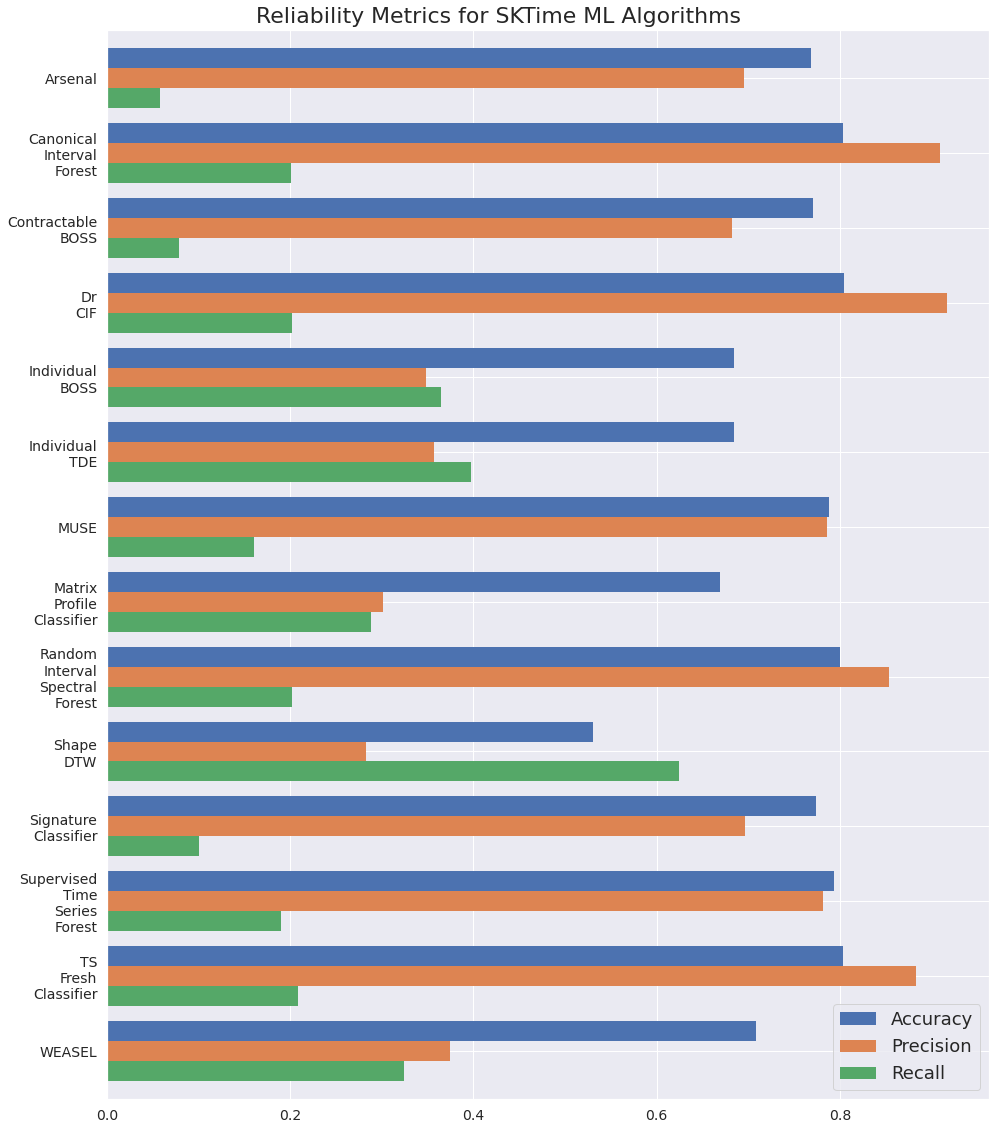

In [138]:
df = MAKEBARCHARTS()
#fig

In [ ]:
maxLen = 2289

# split into 4
def MakeRandom(num):
    
    inarr = [0,0,0,0]
    i = 0
    while i < 3:
        inarr[i] = random.randint(0,num)
        num = num - inarr[i]
        i = i + 1
        next
    inarr[3] = num
    
    return (inarr)

In [ ]:
TP, FP, TN, FN = MakeRandom(maxLen)

acc = (TP+TN)/(TN+TP+FN+FP)
pre = (TP) / (TP+FP)
rec = (TP) / (TP+FN)

In [139]:
_,_,_,y_test = np.load("X_y_test_train_split.npy", allow_pickle=True)

y_pred = np.array([round(random.uniform(0, 1)) for x in y_test])
    
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f"{acc}\n{pre}\n{rec}")

0.5115771079073831
0.24779541446208111
0.5146520146520146


In [140]:
# Add Yes/No/Monkey
columnList = ['Accuracy', 'Precision', 'Recall']
df2 = pd.DataFrame([[0.23, 0.23, 1.0], [0.75, 0, 0], [acc,pre,rec]], columns=columnList, index=['Always\nPredicts\nPositive', 'Always\nPredicts\nNegative', 'Random'])
df = df.append(df2)
df

,Accuracy,Precision,Recall
Arsenal,0.768458,0.695652,0.058394
Canonical\nInterval\nForest,0.803844,0.909091,0.200730
Contractable\nBOSS,0.770642,0.682540,0.078467
Dr\nCIF,0.804718,0.917355,0.202555
Individual\nBOSS,0.684578,0.348432,0.364964
Individual\nTDE,0.684578,0.357377,0.397810
MUSE,0.788554,0.785714,0.160584
Matrix\nProfile\nClassifier,0.669725,0.301527,0.288321
Random\nInterval\nSpectral\nForest,0.800786,0.853846,0.202555
Shape\nDTW,0.530799,0.282645,0.624088


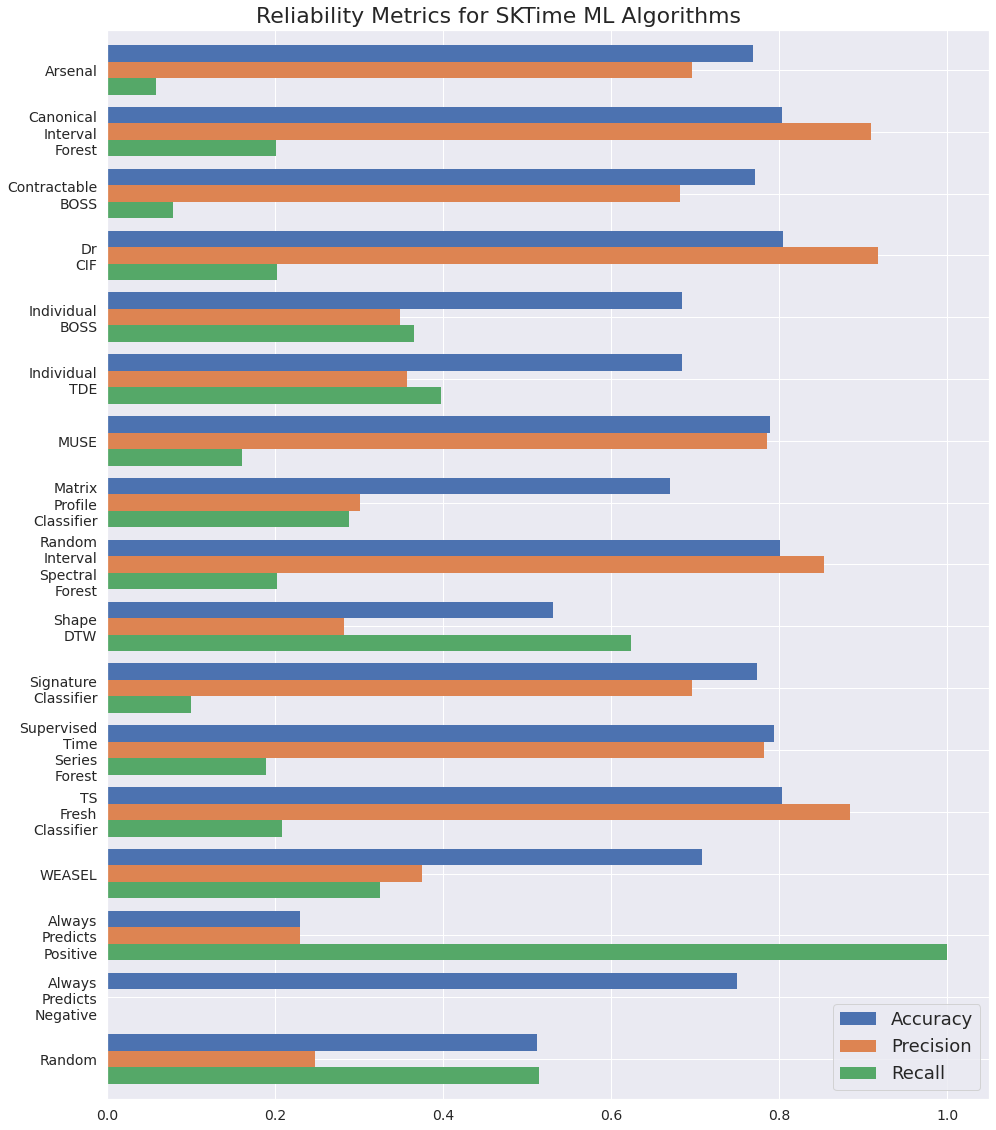

In [142]:
# Lastly, make and save the image
fig = df.plot.barh(rot=0, ylim=[0,1], fontsize=14, width = 0.8, linewidth=0)
plt.gcf().suptitle("Reliability Metrics for SKTime ML Algorithms",fontsize=22)
fig.legend(loc=0, prop={'size': 18})
plt.tight_layout()
plt.gca().invert_yaxis()
fig.figure.savefig("./img/SKTIME_METRICS_YNM.png")

In [143]:
#df['SUMM'] = df['Accuracy']+df['Precision']+df['Recall']
#df_sorted = df.sort_values(["SUMM"], ascending=False)

df['WEIGHT'] = 0.3*df['Accuracy']+0.3*df['Precision']+0.4*df['Recall']

df.sort_values(['WEIGHT'], ascending=False)

,Accuracy,Precision,Recall,WEIGHT
Dr\nCIF,0.804718,0.917355,0.202555,0.597644
Canonical\nInterval\nForest,0.803844,0.909091,0.200730,0.594173
TS\nFresh\nClassifier,0.803844,0.883721,0.208029,0.589481
Random\nInterval\nSpectral\nForest,0.800786,0.853846,0.202555,0.577412
Supervised\nTime\nSeries\nForest,0.793360,0.781955,0.189781,0.548507
Always\nPredicts\nPositive,0.230000,0.230000,1.000000,0.538000
MUSE,0.788554,0.785714,0.160584,0.536514
Shape\nDTW,0.530799,0.282645,0.624088,0.493668
Signature\nClassifier,0.774137,0.696203,0.100365,0.481248
Individual\nTDE,0.684578,0.357377,0.397810,0.471711


### Forest/Tree classifies appear to be better than others? Why work better than other ones / random ones?

---

#### Calculating Random Prediciton with Error Bars

In [144]:
def GetRandomStats(y_test):

    y_pred = np.array([round(random.uniform(0, 1)) for x in y_test])

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    return([acc,pre,rec])

In [146]:
from sklearn.model_selection import train_test_split

numReps = 100000
rndList = [[0,0,0]] * numReps

dataArr = np.load("filteredfluxlistONEORNONE.npy")
checkArr = [1 if x==1 else 0 for x in np.load("one_or_none_isplanetlist.npy")]

#_,_,_,ytest = np.load("X_y_test_train_split.npy", allow_pickle=True)
_,_,_, ytest = train_test_split(dataArr, checkArr, random_state=42)

print("Percent Done:")

for i in range(numReps):
    if (i+1) % 1000 == 0:
        _,_,_, ytest = train_test_split(dataArr, checkArr, random_state=42)
        print((i+1)//1000,end=', ')
    rndList[i] = GetRandomStats(ytest)

Percent Done:
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 

In [55]:
rndArr = np.array(rndList)

In [111]:
accArr = rndArr[:,0]
preArr = rndArr[:,1]
recArr = rndArr[:,2]

accSUM = np.average(accArr)
preSUM = np.average(preArr)
recSUM = np.average(recArr)

accMEAN = np.mean(accArr)
preMEAN = np.mean(preArr)
recMEAN = np.mean(recArr)
rndSUM = np.array([accMEAN,preMEAN,recMEAN])

accSTD = np.std(accArr)
preSTD = np.std(preArr)
recSTD = np.std(recArr)
rndERR = np.array([accSTD,preSTD,recSTD])

In [108]:
rndSUM

array([0.4999432 , 0.23719243, 0.49999042])

In [113]:
df2 = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall'], index=['Random'], data = [rndSUM])
df2

,Accuracy,Precision,Recall
Random,0.499943,0.237192,0.49999


In [116]:
df3 = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall'], index=['Errs'], data = [rndERR])
df3

,Accuracy,Precision,Recall
Errs,0.010459,0.008893,0.021448


In [119]:
accARR.std()

0.010458617735811632

ValueError: The lengths of the data (1) and the error 3 do not match

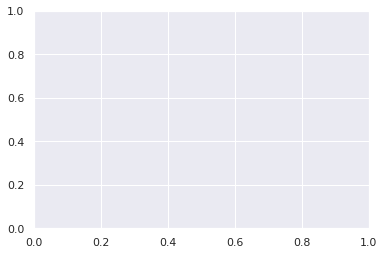

In [132]:
plt.rcParams["figure.figsize"] = (6,4)
#df2.plot.bar(rot=0, ylim=[0,1], fontsize=14, width = 0.8, linewidth=0, yerr = [[0.2,1],[5,0.3]])
df2.plot.bar(yerr=[[0.2,0.1,0.6]])
plt.ylim([0,1])
plt.rcParams["figure.figsize"] = (14,16)